In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('health-outcomes-csv.csv', index_col='index')

In [3]:
df.head(10)

,Country,Infants exclusively breastfed (% ages 0Ð5 months) 2008Ð2013,Infants lacking immunization (% of one-year-olds) DTP 2013,Infants lacking immunization (% of one-year-olds) Measles 2013,"Mortality rates (per 1,000 live births) Infant 2013","Mortality rates (per 1,000 live births) Under-five 2013",Child malnutrition (% under age 5) Stunting (moderate or severe) 2008Ð2013,"Adult mortality rate (per 1,000 people) Female 2013","Adult mortality rate (per 1,000 people) Male 2013","Deaths due to Malaria (per 100,000 people) 2012","Deaths due to Tuberculosis (per 100,000 people) 2012","HIV prevalence, adult (% ages 15Ð49) 2013",Life expectancy at age 60 (years) 2010/2015,"Physicians (per 10,000 people) 2001Ð2013",Public health expenditure (% of GDP) 2013
index,,,,,,,,,,,,,,,
0,Norway,NaN,1.0,7.0,2.3,2.8,NaN,47.0,73.0,NaN,0.1,NaN,24.0,37.4,9.6
1,Netherlands,NaN,1.0,4.0,3.3,4.0,NaN,54.0,69.0,NaN,0.2,NaN,23.5,31.5,12.9
2,Sweden,NaN,1.0,3.0,2.4,3.0,NaN,43.0,69.0,NaN,0.1,NaN,24.1,32.7,9.7
3,Korea (Republic of),NaN,1.0,1.0,3.2,3.7,2.5,38.0,93.0,0.0,5.4,NaN,24.0,21.4,7.2
4,Luxembourg,NaN,1.0,5.0,1.6,2.0,NaN,50.0,79.0,NaN,0.4,NaN,23.4,28.2,7.1
5,Japan,NaN,1.0,5.0,2.1,2.9,NaN,42.0,81.0,NaN,1.7,NaN,26.1,23.0,10.3
6,Belgium,NaN,1.0,8.0,3.5,4.4,NaN,57.0,98.0,NaN,0.4,NaN,23.6,29.9,11.2
7,France,NaN,1.0,11.0,3.5,4.2,NaN,52.0,109.0,NaN,0.5,NaN,25.1,31.8,11.7
8,Finland,NaN,1.0,3.0,2.1,2.6,NaN,51.0,114.0,NaN,0.3,NaN,23.8,29.1,9.4


Global Health Outcomes Data
Impact on Mortality Rates and Malnutrition in Countries Around the World
The dataset provided offers valuable insights into various critical health conditions worldwide, including the frequency of preventable diseases, malnutrition levels, and mortality rates. It provides an extensive documentation of life-threatening diseases like malaria and tuberculosis, which are accompanied by essential health indicators, such as adult mortality rates, public health expenditures, physicians per 10,000 people ratio, and HIV prevalence. This information provides an accurate representation of the development of healthcare systems in various countries, leading to better-informed public policy formation and increased awareness among decision-makers. Researchers can use this data to identify disparities between different regions of the world, allowing for informed global strategies to ensure equitable care globally. Overall, this dataset is a valuable resource for those seeking to evaluate global health trends and regional differences within countries over time.

Analytical Question:

<b><i>How does the prevalence of preventable diseases, such as malaria and tuberculosis, correlate with a country's level of public health expenditures and physicians per 10,000 people ratios?</i></b>

This question is theoretically interesting because it addresses a fundamental issue in global health policy, namely the relationship between healthcare spending and the incidence of preventable diseases. It also has practical importance because it could inform policymakers in developing countries on how much they need to invest in healthcare systems to reduce the incidence of preventable diseases.
To answer this question, I’m going use the public health expenditures data in the dataset to compare the prevalence of preventable diseases in different regions of the world. By analyzing the relationship between healthcare spending and the incidence of preventable diseases, I can determine whether countries need to increase their public health expenditures to improve health outcomes. This analysis could also help identify which regions of the world have the greatest need for increased healthcare spending.


In [4]:
df.shape

(196, 15)

In [5]:
df.columns

Index(['Country',
       'Infants exclusively breastfed (% ages 0Ð5 months) 2008Ð2013',
       'Infants lacking immunization (% of one-year-olds) DTP 2013',
       'Infants lacking immunization (% of one-year-olds) Measles 2013',
       'Mortality rates (per 1,000 live births) Infant 2013',
       'Mortality rates (per 1,000 live births) Under-five 2013',
       'Child malnutrition (% under age 5) Stunting (moderate or severe) 2008Ð2013',
       'Adult mortality rate (per 1,000 people) Female 2013',
       'Adult mortality rate (per 1,000 people) Male 2013',
       'Deaths due to Malaria (per 100,000 people) 2012',
       'Deaths due to Tuberculosis (per 100,000 people) 2012',
       'HIV prevalence, adult (% ages 15Ð49) 2013',
       'Life expectancy at age 60 (years) 2010/2015',
       'Physicians (per 10,000 people) 2001Ð2013',
       'Public health expenditure (% of GDP) 2013'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 0 to 195
Data columns (total 15 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Country                                                                     194 non-null    object 
 1   Infants exclusively breastfed (% ages 0Ð5 months) 2008Ð2013                 125 non-null    float64
 2   Infants lacking immunization (% of one-year-olds) DTP 2013                  192 non-null    float64
 3   Infants lacking immunization (% of one-year-olds) Measles 2013              192 non-null    float64
 4   Mortality rates (per 1,000 live births) Infant 2013                         192 non-null    float64
 5   Mortality rates (per 1,000 live births) Under-five 2013                     192 non-null    float64
 6   Child malnutrition (% under age 5) Stunting (moderate o

In [7]:
# find rows where the value of 'Country' is null
df[df['Country'].isnull()]

,Country,Infants exclusively breastfed (% ages 0Ð5 months) 2008Ð2013,Infants lacking immunization (% of one-year-olds) DTP 2013,Infants lacking immunization (% of one-year-olds) Measles 2013,"Mortality rates (per 1,000 live births) Infant 2013","Mortality rates (per 1,000 live births) Under-five 2013",Child malnutrition (% under age 5) Stunting (moderate or severe) 2008Ð2013,"Adult mortality rate (per 1,000 people) Female 2013","Adult mortality rate (per 1,000 people) Male 2013","Deaths due to Malaria (per 100,000 people) 2012","Deaths due to Tuberculosis (per 100,000 people) 2012","HIV prevalence, adult (% ages 15Ð49) 2013",Life expectancy at age 60 (years) 2010/2015,"Physicians (per 10,000 people) 2001Ð2013",Public health expenditure (% of GDP) 2013
index,,,,,,,,,,,,,,,
194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# drop rows where the value of 'Country' is null
df.dropna(subset=['Country'], inplace=True)

In [9]:
print(df.isnull().sum())

Country                                                                         0
Infants exclusively breastfed (% ages 0Ð5 months) 2008Ð2013                    69
Infants lacking immunization (% of one-year-olds) DTP 2013                      2
Infants lacking immunization (% of one-year-olds) Measles 2013                  2
Mortality rates (per 1,000 live births) Infant 2013                             2
Mortality rates (per 1,000 live births) Under-five 2013                         2
Child malnutrition (% under age 5) Stunting (moderate or severe) 2008Ð2013     51
Adult mortality rate (per 1,000 people) Female 2013                             3
Adult mortality rate (per 1,000 people) Male 2013                               3
Deaths due to Malaria (per 100,000 people) 2012                               102
Deaths due to Tuberculosis (per 100,000 people) 2012                            1
HIV prevalence, adult (% ages 15Ð49) 2013                                      76
Life expectancy 

In [10]:
df.drop(columns=['Deaths due to Malaria (per 100,000 people) 2012', 'Infants exclusively breastfed (% ages 0Ð5 months) 2008Ð2013'], inplace=True)

In [11]:
features = ['Infants lacking immunization (% of one-year-olds) DTP',
       'Infants lacking immunization (% of one-year-olds) Measles',
       'Mortality rates (per 1,000 live births) Infant',
       'Mortality rates (per 1,000 live births) Under-five',
       'Child malnutrition (% under age 5) Stunting (moderate or severe)',
       'Adult mortality rate (per 1,000 people) Female',
       'Adult mortality rate (per 1,000 people) Male',
       'Deaths due to Tuberculosis (per 100,000 people)',
       'HIV prevalence, adult (% ages 15-49)',
       'Life expectancy at age 60 (years)',
       'Physicians (per 10,000 people)',
       'Public health expenditure (% of GDP)']
f = features.copy()
f.insert(0, "Country")

df.columns = f

In [12]:
# find rows where the value of 'County' is null
df[df['Public health expenditure (% of GDP)'].isnull()]

,Country,Infants lacking immunization (% of one-year-olds) DTP,Infants lacking immunization (% of one-year-olds) Measles,"Mortality rates (per 1,000 live births) Infant","Mortality rates (per 1,000 live births) Under-five",Child malnutrition (% under age 5) Stunting (moderate or severe),"Adult mortality rate (per 1,000 people) Female","Adult mortality rate (per 1,000 people) Male","Deaths due to Tuberculosis (per 100,000 people)","HIV prevalence, adult (% ages 15-49)",Life expectancy at age 60 (years),"Physicians (per 10,000 people)",Public health expenditure (% of GDP)
index,,,,,,,,,,,,,
51,"Palestine, State of",1.0,1.0,18.6,21.8,10.9,NaN,NaN,0.2,NaN,18.7,NaN,NaN
79,Nauru,2.0,4.0,29.9,36.6,24.0,44.0,88.0,9.5,NaN,NaN,7.1,NaN
128,Korea (Democratic People's Rep. of),6.0,1.0,21.7,27.4,27.9,111.0,183.0,9.0,NaN,16.8,32.9,NaN
190,Somalia,48.0,54.0,89.8,145.6,42.1,289.0,339.0,64.0,0.5,16.1,0.4,NaN
192,"Hong Kong, China (SAR)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,NaN,25.4,NaN,NaN
193,Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df[df['Physicians (per 10,000 people)'].isnull()]

,Country,Infants lacking immunization (% of one-year-olds) DTP,Infants lacking immunization (% of one-year-olds) Measles,"Mortality rates (per 1,000 live births) Infant","Mortality rates (per 1,000 live births) Under-five",Child malnutrition (% under age 5) Stunting (moderate or severe),"Adult mortality rate (per 1,000 people) Female","Adult mortality rate (per 1,000 people) Male","Deaths due to Tuberculosis (per 100,000 people)","HIV prevalence, adult (% ages 15-49)",Life expectancy at age 60 (years),"Physicians (per 10,000 people)",Public health expenditure (% of GDP)
index,,,,,,,,,,,,,
25,Antigua and Barbuda,1.0,2.0,7.7,9.3,NaN,145.0,201.0,1.4,NaN,21.5,NaN,4.9
51,"Palestine, State of",1.0,1.0,18.6,21.8,10.9,NaN,NaN,0.2,NaN,18.7,NaN,NaN
163,Haiti,14.0,35.0,54.7,72.8,21.9,221.0,263.0,25.0,2.0,17.2,NaN,9.4
186,South Sudan,43.0,70.0,64.1,99.2,31.1,323.0,353.0,30.0,2.2,16.4,NaN,2.2
192,"Hong Kong, China (SAR)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,NaN,25.4,NaN,NaN
193,Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.describe()

,Infants lacking immunization (% of one-year-olds) DTP,Infants lacking immunization (% of one-year-olds) Measles,"Mortality rates (per 1,000 live births) Infant","Mortality rates (per 1,000 live births) Under-five",Child malnutrition (% under age 5) Stunting (moderate or severe),"Adult mortality rate (per 1,000 people) Female","Adult mortality rate (per 1,000 people) Male","Deaths due to Tuberculosis (per 100,000 people)","HIV prevalence, adult (% ages 15-49)",Life expectancy at age 60 (years),"Physicians (per 10,000 people)",Public health expenditure (% of GDP)
count,192.000000,192.000000,192.000000,192.000000,143.000000,191.000000,191.000000,193.000000,118.000000,185.000000,188.000000,188.000000
mean,7.130208,12.437500,25.496354,34.583854,24.124476,137.643979,198.460733,12.547668,1.993220,19.471351,16.088830,6.729255
std,9.921616,13.372091,23.379269,35.466703,14.238330,96.984583,99.007003,18.762193,4.211253,2.928438,14.709149,2.860508
min,1.000000,1.000000,1.600000,2.000000,1.300000,36.000000,54.000000,0.000000,0.100000,13.700000,0.100000,1.300000
25%,1.000000,3.000000,7.000000,8.200000,11.450000,67.000000,116.000000,1.000000,0.225000,17.100000,2.875000,4.600000
50%,3.000000,7.000000,15.300000,17.900000,23.000000,99.000000,183.000000,4.200000,0.600000,19.100000,12.150000,6.350000
75%,9.000000,18.000000,39.650000,52.175000,34.900000,194.000000,255.000000,16.000000,1.650000,21.500000,27.525000,8.600000
max,65.000000,75.000000,101.600000,167.400000,59.300000,496.000000,577.000000,111.000000,27.400000,26.100000,77.400000,19.700000


In [15]:
df.head()

,Country,Infants lacking immunization (% of one-year-olds) DTP,Infants lacking immunization (% of one-year-olds) Measles,"Mortality rates (per 1,000 live births) Infant","Mortality rates (per 1,000 live births) Under-five",Child malnutrition (% under age 5) Stunting (moderate or severe),"Adult mortality rate (per 1,000 people) Female","Adult mortality rate (per 1,000 people) Male","Deaths due to Tuberculosis (per 100,000 people)","HIV prevalence, adult (% ages 15-49)",Life expectancy at age 60 (years),"Physicians (per 10,000 people)",Public health expenditure (% of GDP)
index,,,,,,,,,,,,,
0,Norway,1.0,7.0,2.3,2.8,NaN,47.0,73.0,0.1,NaN,24.0,37.4,9.6
1,Netherlands,1.0,4.0,3.3,4.0,NaN,54.0,69.0,0.2,NaN,23.5,31.5,12.9
2,Sweden,1.0,3.0,2.4,3.0,NaN,43.0,69.0,0.1,NaN,24.1,32.7,9.7
3,Korea (Republic of),1.0,1.0,3.2,3.7,2.5,38.0,93.0,5.4,NaN,24.0,21.4,7.2
4,Luxembourg,1.0,5.0,1.6,2.0,NaN,50.0,79.0,0.4,NaN,23.4,28.2,7.1


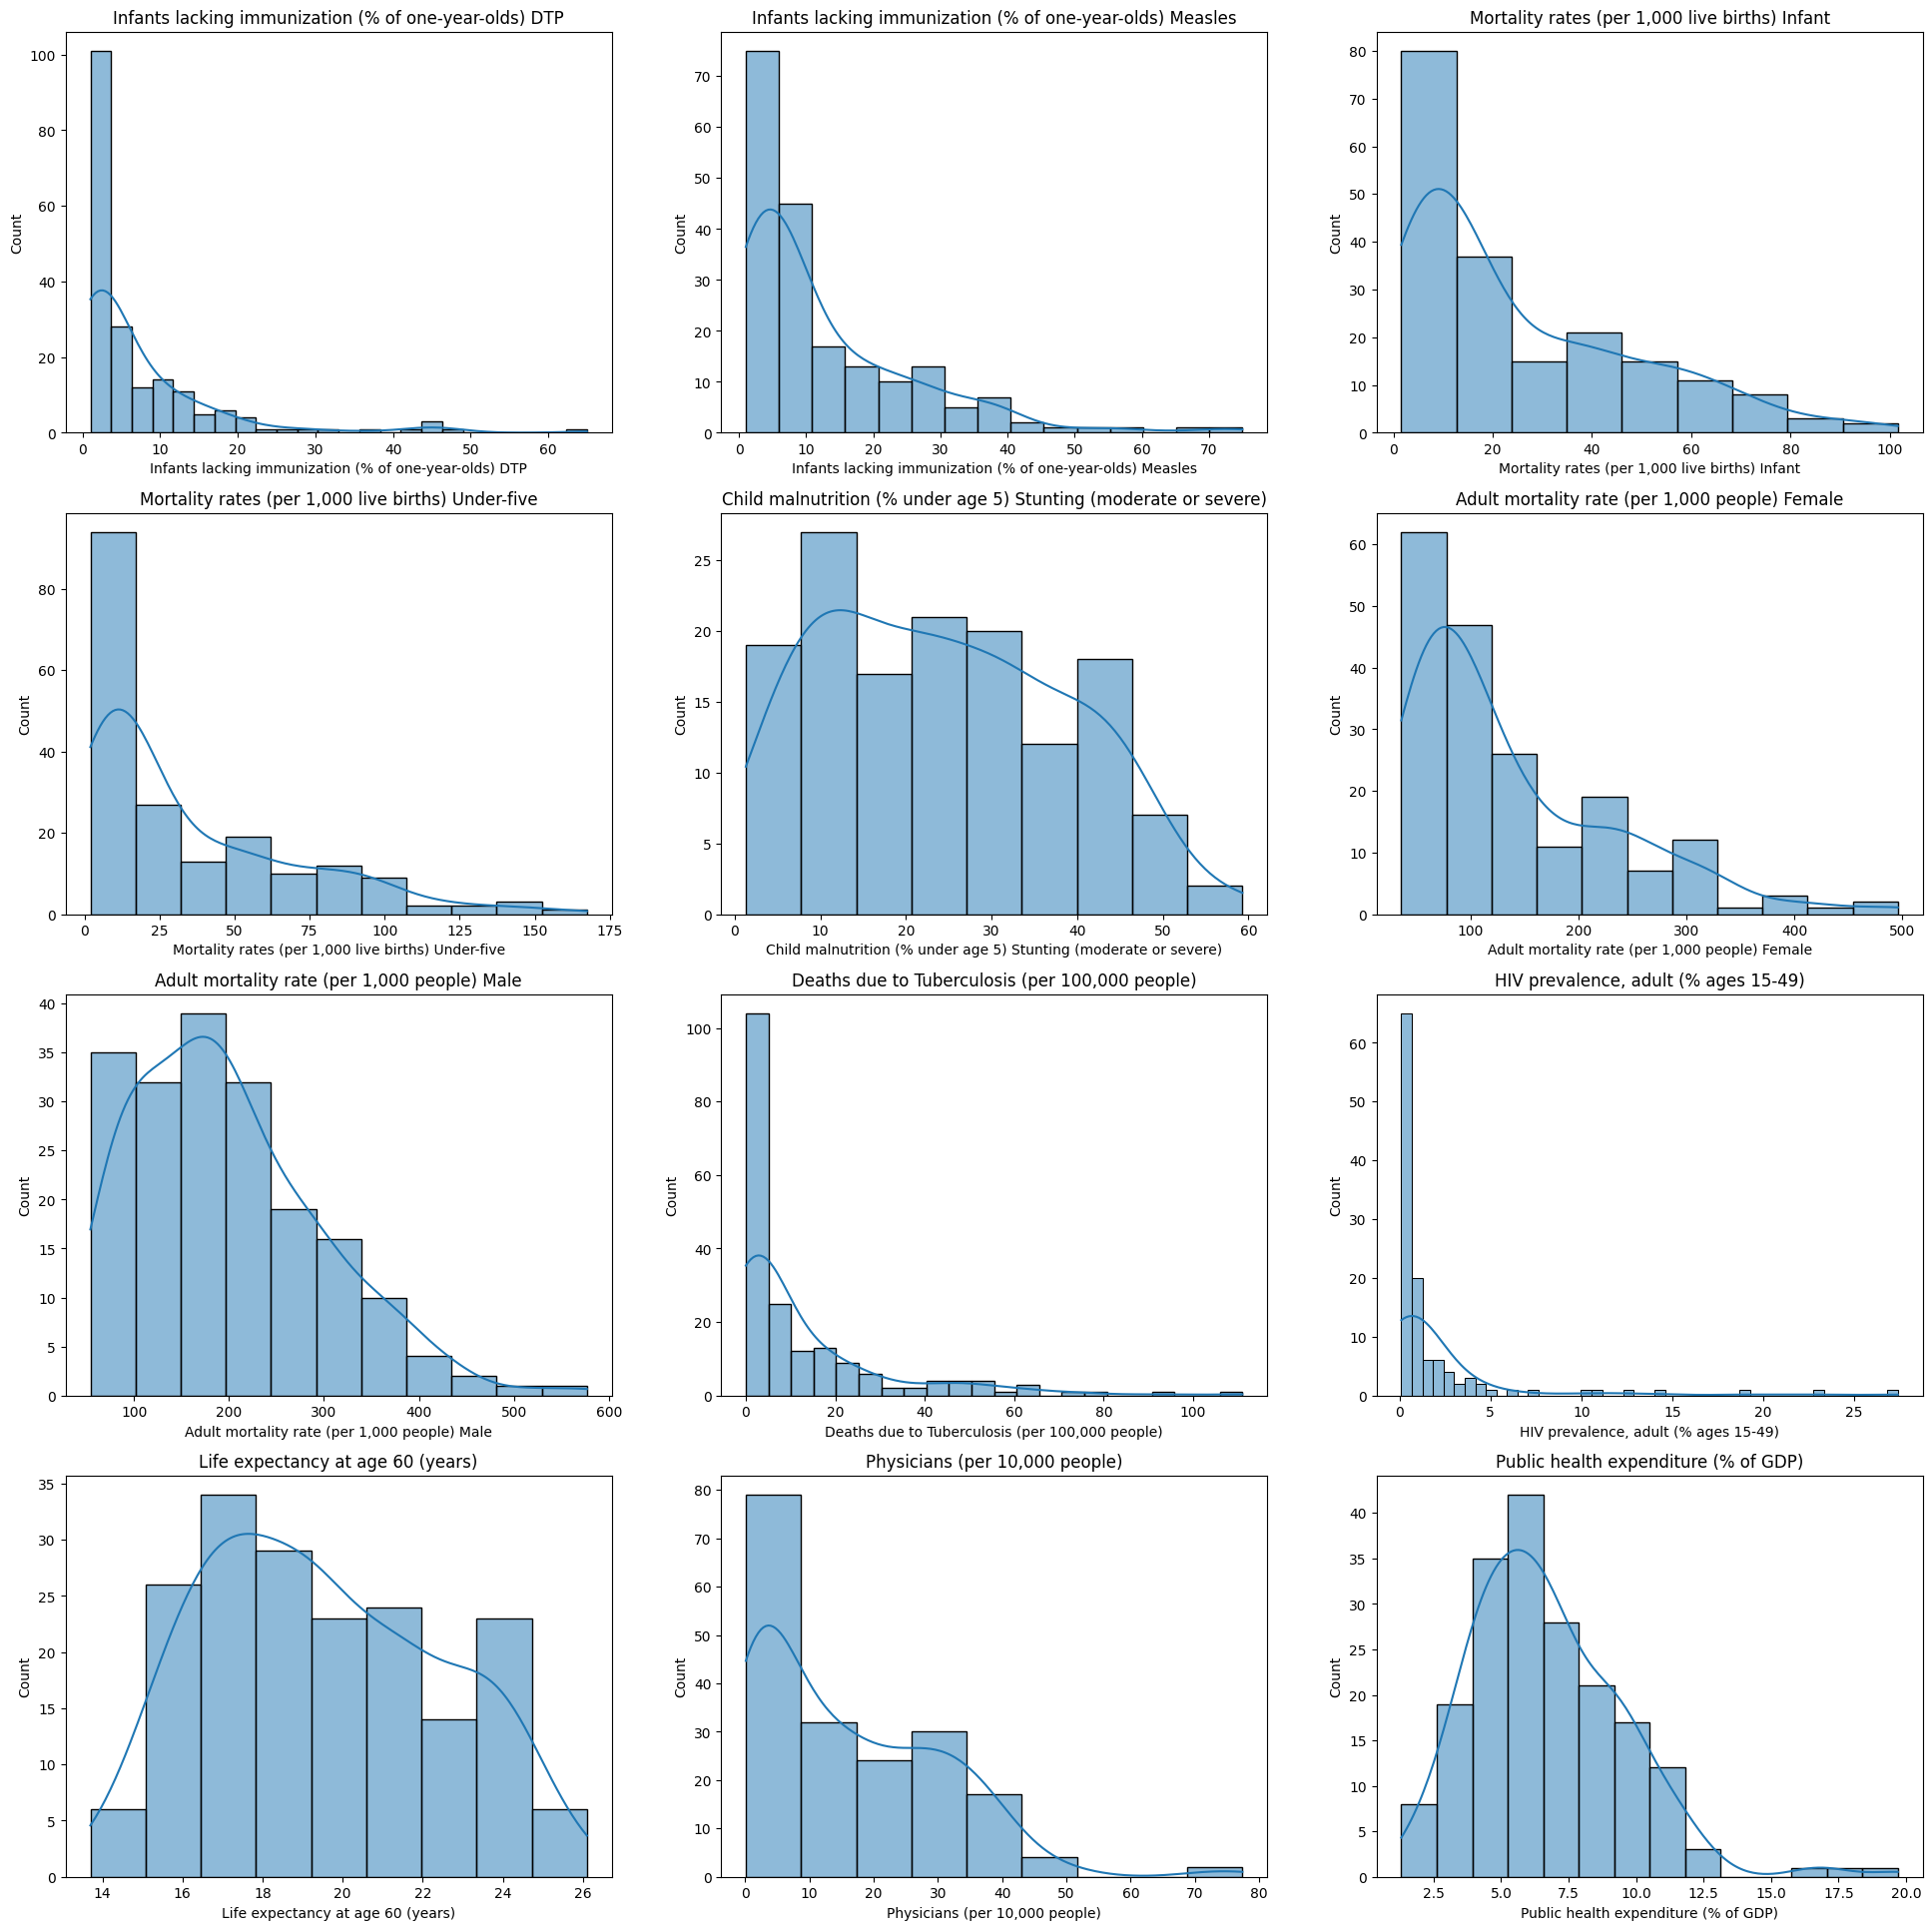

In [16]:
# subplot of the distribution of each variable

fig, axes = plt.subplots(4, 3, figsize=(24, 24))
cols = df.columns[1:]

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i//3, i%3]) 
    axes[i//3, i%3].set_title(col)

In [17]:
df2  = df.reset_index(drop=True)

In [18]:
df2.head()

,Country,Infants lacking immunization (% of one-year-olds) DTP,Infants lacking immunization (% of one-year-olds) Measles,"Mortality rates (per 1,000 live births) Infant","Mortality rates (per 1,000 live births) Under-five",Child malnutrition (% under age 5) Stunting (moderate or severe),"Adult mortality rate (per 1,000 people) Female","Adult mortality rate (per 1,000 people) Male","Deaths due to Tuberculosis (per 100,000 people)","HIV prevalence, adult (% ages 15-49)",Life expectancy at age 60 (years),"Physicians (per 10,000 people)",Public health expenditure (% of GDP)
0,Norway,1.0,7.0,2.3,2.8,NaN,47.0,73.0,0.1,NaN,24.0,37.4,9.6
1,Netherlands,1.0,4.0,3.3,4.0,NaN,54.0,69.0,0.2,NaN,23.5,31.5,12.9
2,Sweden,1.0,3.0,2.4,3.0,NaN,43.0,69.0,0.1,NaN,24.1,32.7,9.7
3,Korea (Republic of),1.0,1.0,3.2,3.7,2.5,38.0,93.0,5.4,NaN,24.0,21.4,7.2
4,Luxembourg,1.0,5.0,1.6,2.0,NaN,50.0,79.0,0.4,NaN,23.4,28.2,7.1


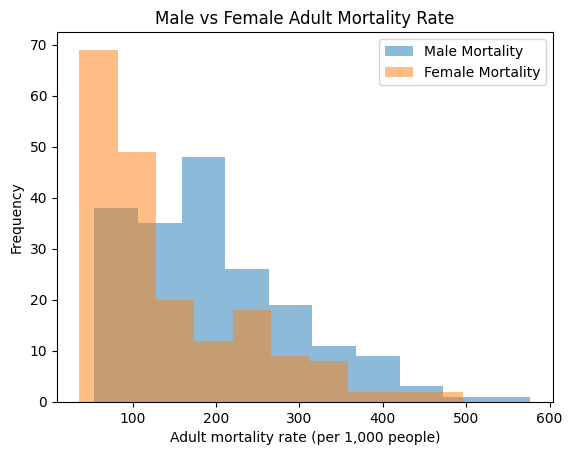

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = df

# Select the columns of interest
male_mortality_rate = data['Adult mortality rate (per 1,000 people) Male']
female_mortality_rate = data['Adult mortality rate (per 1,000 people) Female']

# Create the histogram using matplotlib
plt.hist(male_mortality_rate, alpha=0.5, label='Male Mortality')
plt.hist(female_mortality_rate, alpha=0.5, label='Female Mortality')
plt.xlabel('Adult mortality rate (per 1,000 people)')
plt.ylabel('Frequency')
plt.title('Male vs Female Adult Mortality Rate')
plt.legend()
plt.show()




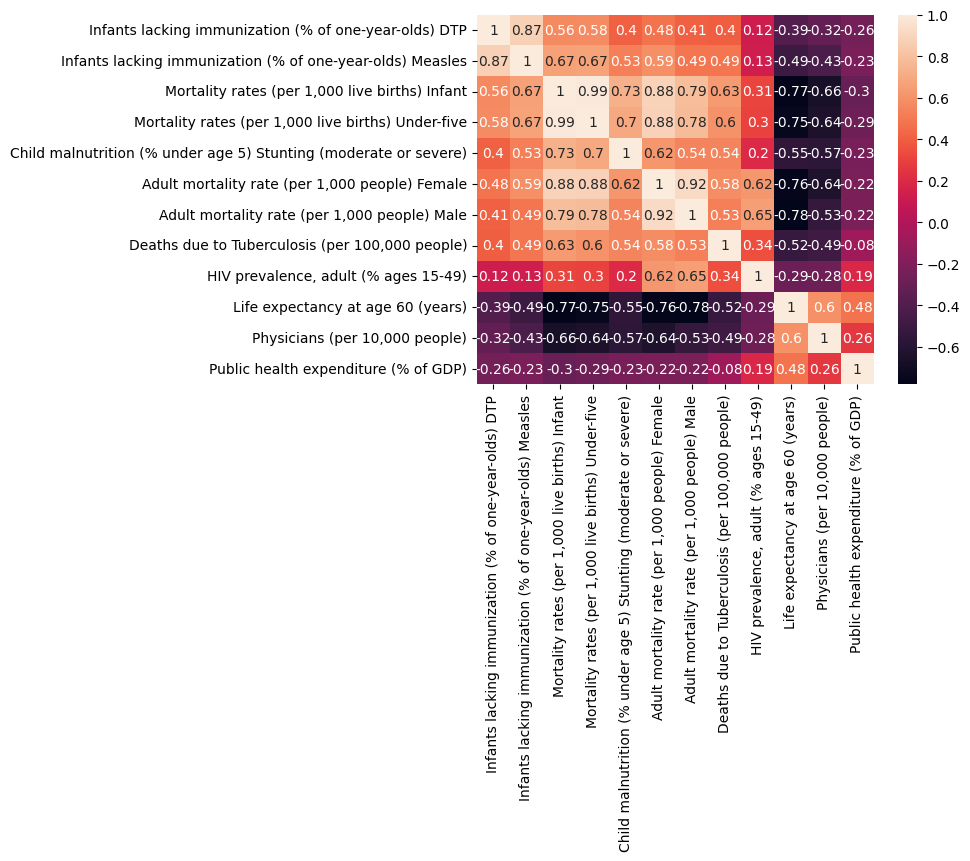

In [20]:
# Create a heatmap to visualize the correlation matrix of relevant variables
sns.heatmap(df[df.columns[1:]].corr(), annot=True)
plt.show()

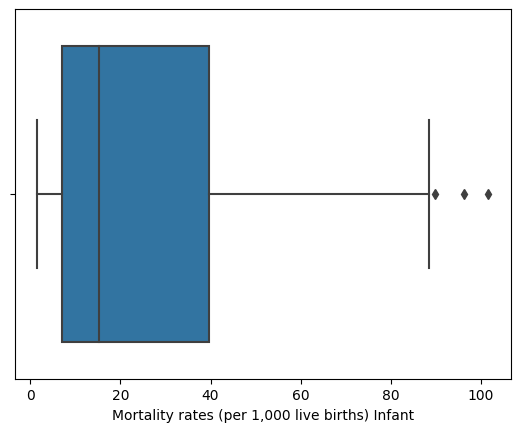

In [24]:
sns.boxplot(data=df, x='Mortality rates (per 1,000 live births) Infant')
plt.show()

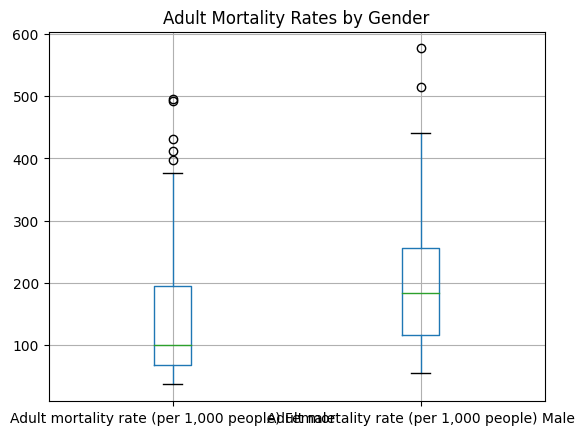

In [25]:
# Boxplot of Adult Mortality Rates by Gender
df.boxplot(column=["Adult mortality rate (per 1,000 people) Female", "Adult mortality rate (per 1,000 people) Male"])
plt.title("Adult Mortality Rates by Gender")
plt.show()

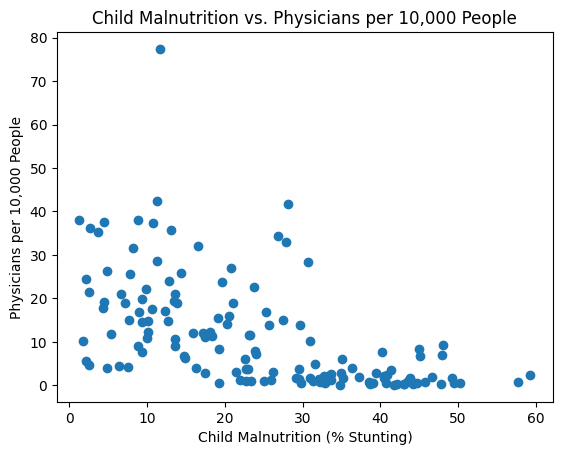

In [27]:
# Scatterplot of Child Malnutrition vs. Physicians per 10,000 people
plt.scatter(df["Child malnutrition (% under age 5) Stunting (moderate or severe)"], df["Physicians (per 10,000 people)"])
plt.xlabel("Child Malnutrition (% Stunting)")
plt.ylabel("Physicians per 10,000 People")
plt.title("Child Malnutrition vs. Physicians per 10,000 People")
plt.show()

In [28]:
# for col in df.columns[1:]:
#     sns.boxplot(df[col])
#     plt.title(col)
#     plt.show()
    
#     sns.violinplot(df[col])
#     plt.title(col)
#     plt.show()

C:\Users\darklane\AppData\Local\Temp\ipykernel_740\1330633712.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)


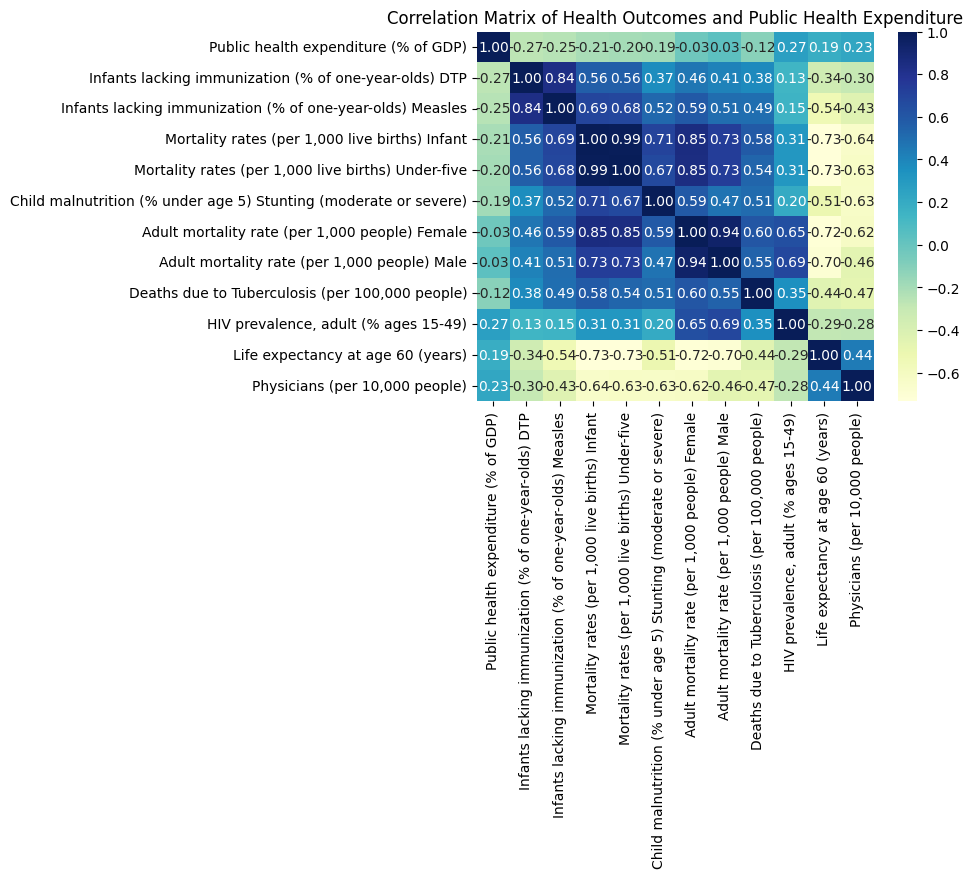

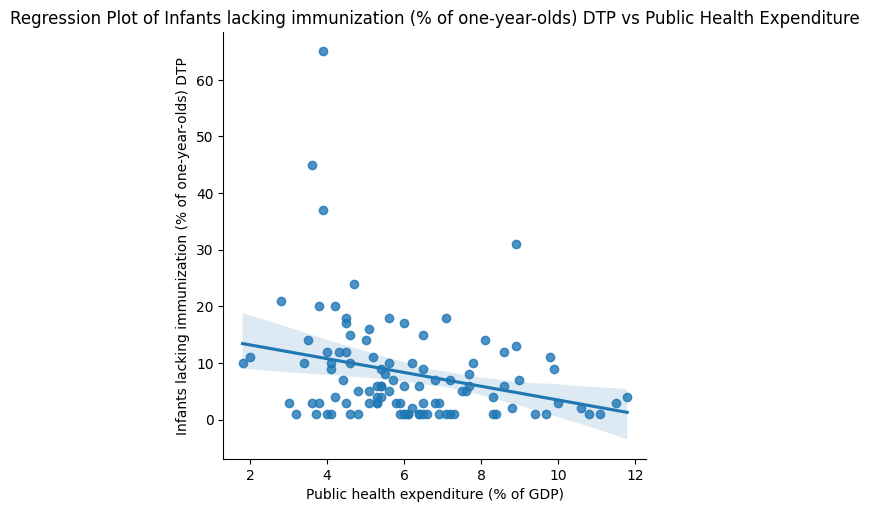

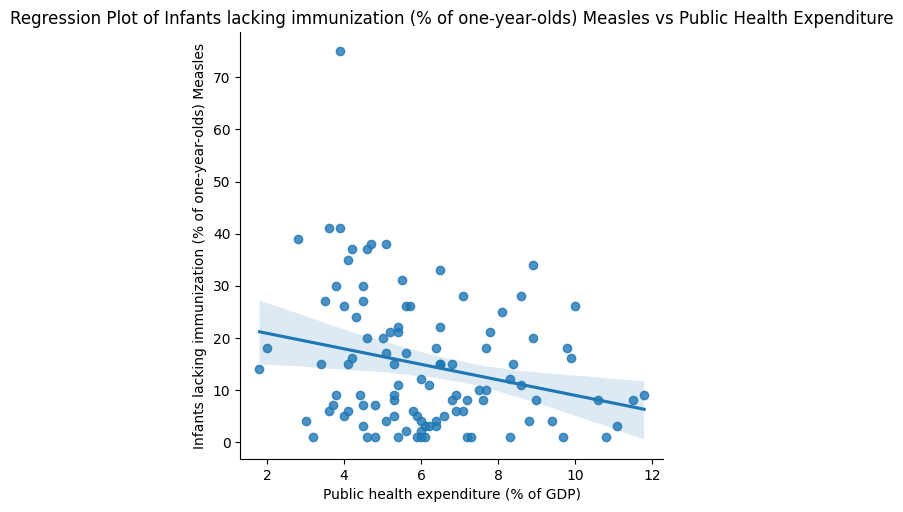

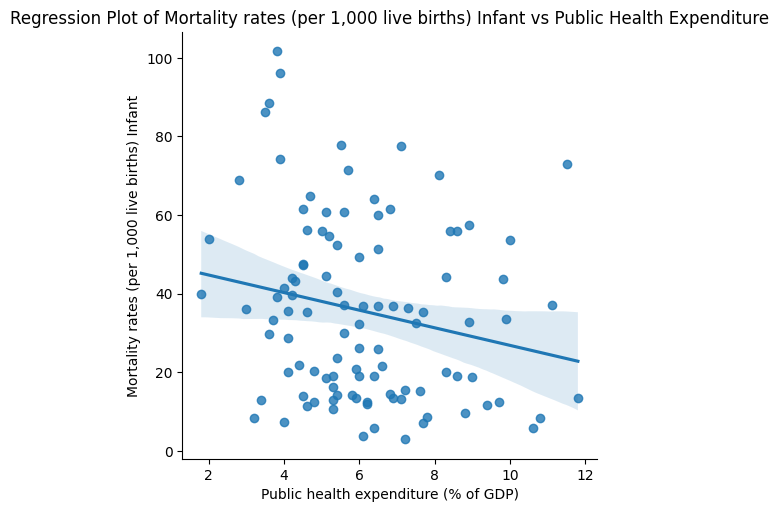

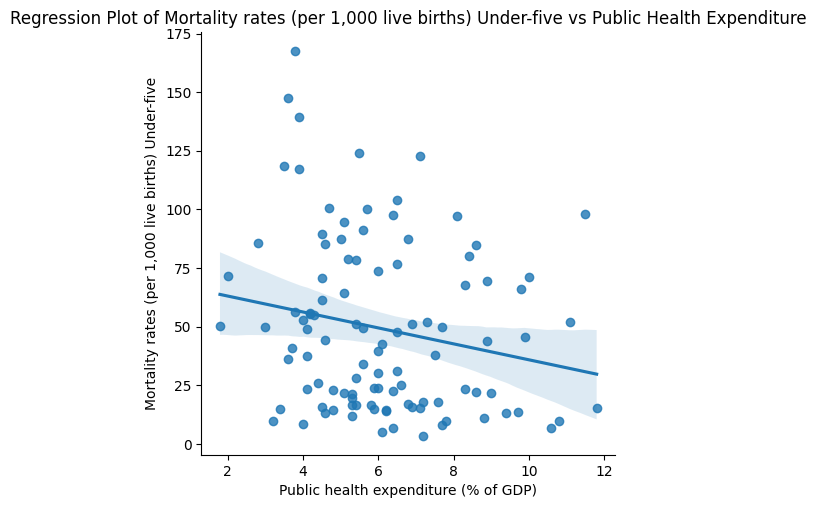

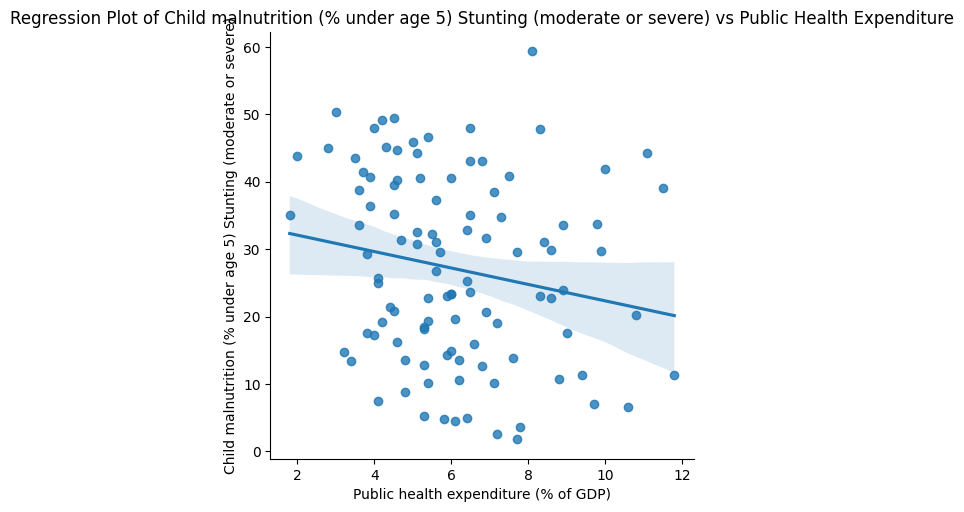

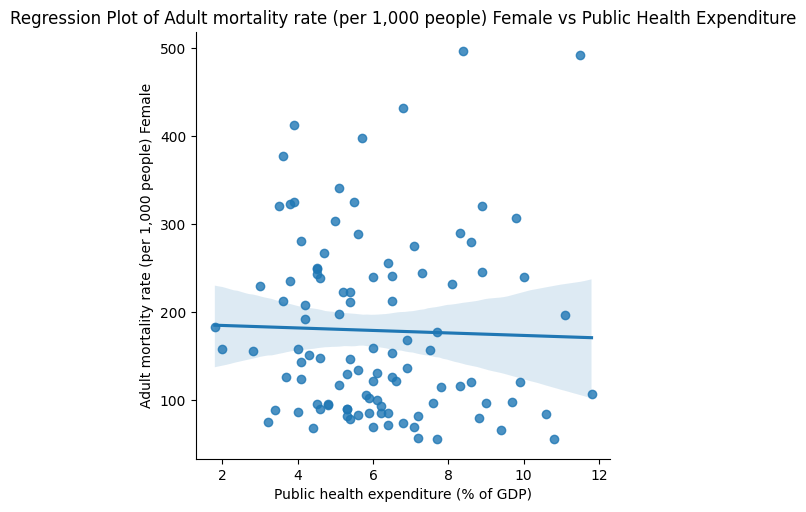

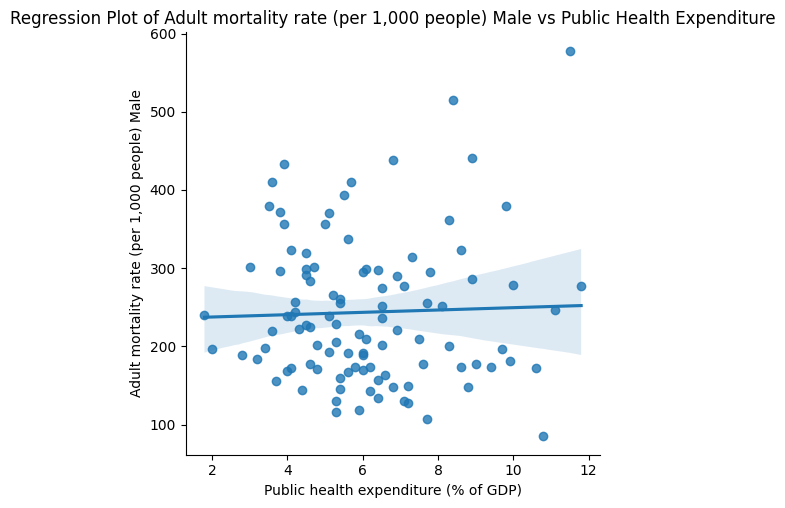

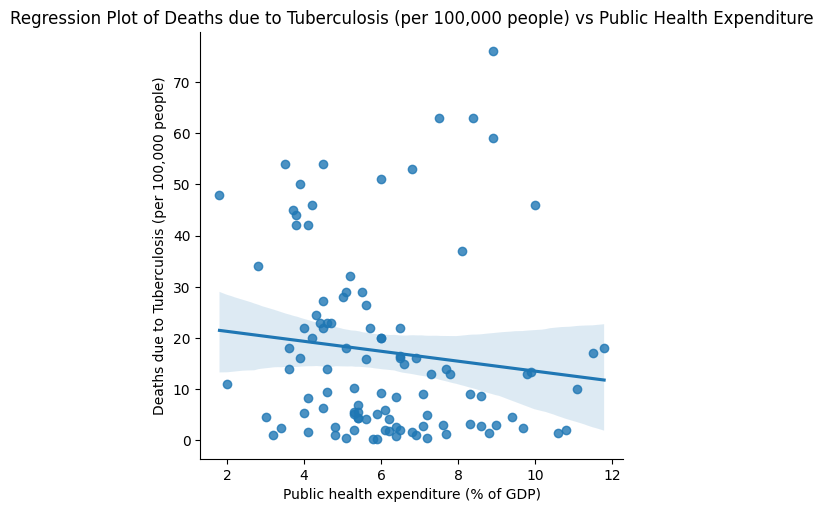

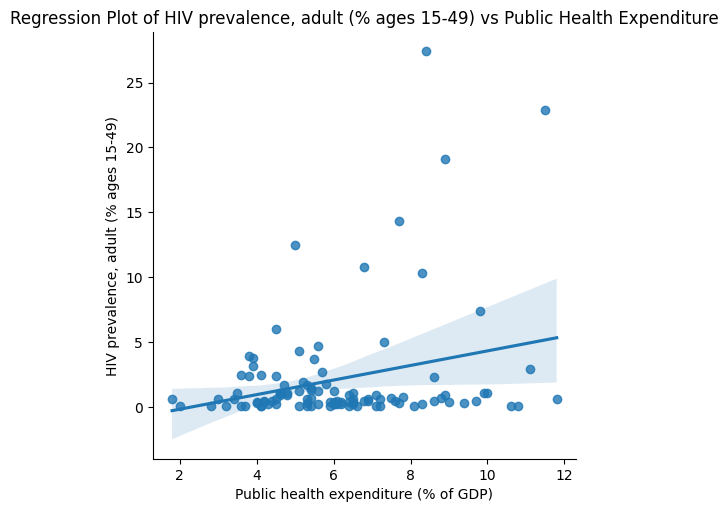

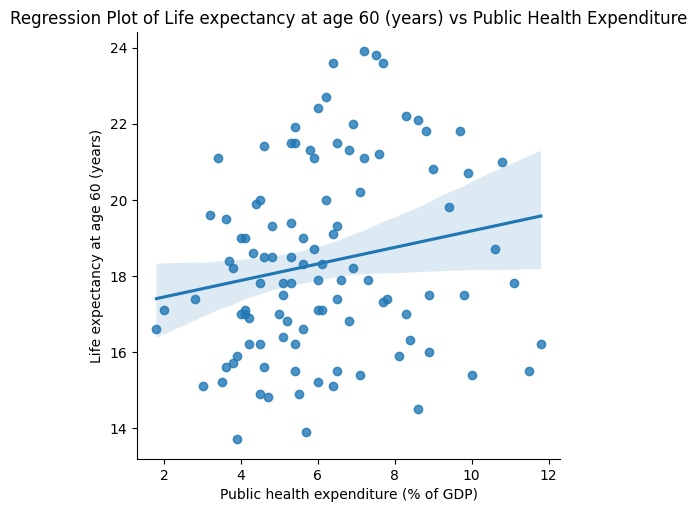

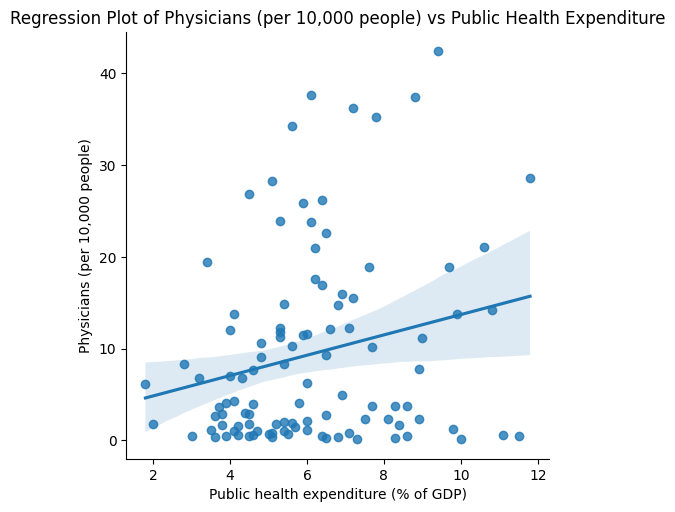

In [29]:
# Create a subset of the data with the relevant variables
subset = df[['Public health expenditure (% of GDP)', 
             'Infants lacking immunization (% of one-year-olds) DTP',
             'Infants lacking immunization (% of one-year-olds) Measles',
             'Mortality rates (per 1,000 live births) Infant',
             'Mortality rates (per 1,000 live births) Under-five',
             'Child malnutrition (% under age 5) Stunting (moderate or severe)',
             'Adult mortality rate (per 1,000 people) Female',
             'Adult mortality rate (per 1,000 people) Male',
             'Deaths due to Tuberculosis (per 100,000 people)',
             'HIV prevalence, adult (% ages 15-49)',
             'Life expectancy at age 60 (years)',
             'Physicians (per 10,000 people)']]

# Remove missing values
subset.dropna(inplace=True)

# Create a correlation matrix
corr = subset.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Correlation Matrix of Health Outcomes and Public Health Expenditure")
plt.show()

# Create scatterplots with regression lines for each variable
for column in subset.columns[1:]:
    sns.lmplot(x='Public health expenditure (% of GDP)', y=column, data=subset)
    plt.title(f"Regression Plot of {column} vs Public Health Expenditure")
    plt.show()


## Machine Lerning

In [30]:
df2 = df[df.columns[1:]]
df2.columns

Index(['Infants lacking immunization (% of one-year-olds) DTP',
       'Infants lacking immunization (% of one-year-olds) Measles',
       'Mortality rates (per 1,000 live births) Infant',
       'Mortality rates (per 1,000 live births) Under-five',
       'Child malnutrition (% under age 5) Stunting (moderate or severe)',
       'Adult mortality rate (per 1,000 people) Female',
       'Adult mortality rate (per 1,000 people) Male',
       'Deaths due to Tuberculosis (per 100,000 people)',
       'HIV prevalence, adult (% ages 15-49)',
       'Life expectancy at age 60 (years)', 'Physicians (per 10,000 people)',
       'Public health expenditure (% of GDP)'],
      dtype='object')

In [31]:
features = ['Infants lacking immunization (% of one-year-olds) DTP',
       'Infants lacking immunization (% of one-year-olds) Measles',
       'Mortality rates (per 1,000 live births) Infant',
       'Mortality rates (per 1,000 live births) Under-five',
       'Child malnutrition (% under age 5) Stunting (moderate or severe)',
       'Adult mortality rate (per 1,000 people) Female',
       'Adult mortality rate (per 1,000 people) Male',
       'Deaths due to Tuberculosis (per 100,000 people)',
       'HIV prevalence, adult (% ages 15-49)',
       'Life expectancy at age 60 (years)',
       'Physicians (per 10,000 people)',
       'Public health expenditure (% of GDP)']

In [32]:
df.dropna(inplace=True)
df.shape

(104, 13)

In [33]:
df2 = df[features]

### Linear Regression

In [45]:
# Linera Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df2[df2.columns[:-1]]
y = df2[df2.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression().fit(X_train, y_train)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('R-squared:', model.score(X_test, y_test))

Coefficients: [-0.06125244  0.00685219  0.00552188 -0.00225114  0.0032014   0.00596245
 -0.00146048 -0.00441906  0.13159733  0.22114537  0.04812069]
Intercept: 0.9673945543598998
R-squared: 0.3140742193057


In [46]:
coef = pd.DataFrame({'feature': X.columns, 'coef': model.coef_})
coef = coef.reindex(coef.coef.abs().sort_values(ascending=False).index)
print(coef)

                                              feature      coef
9                   Life expectancy at age 60 (years)  0.221145
8                HIV prevalence, adult (% ages 15-49)  0.131597
0   Infants lacking immunization (% of one-year-ol... -0.061252
10                     Physicians (per 10,000 people)  0.048121
1   Infants lacking immunization (% of one-year-ol...  0.006852
5      Adult mortality rate (per 1,000 people) Female  0.005962
2      Mortality rates (per 1,000 live births) Infant  0.005522
7     Deaths due to Tuberculosis (per 100,000 people) -0.004419
4   Child malnutrition (% under age 5) Stunting (m...  0.003201
3   Mortality rates (per 1,000 live births) Under-... -0.002251
6        Adult mortality rate (per 1,000 people) Male -0.001460


In [48]:
coef.to_clipboard()

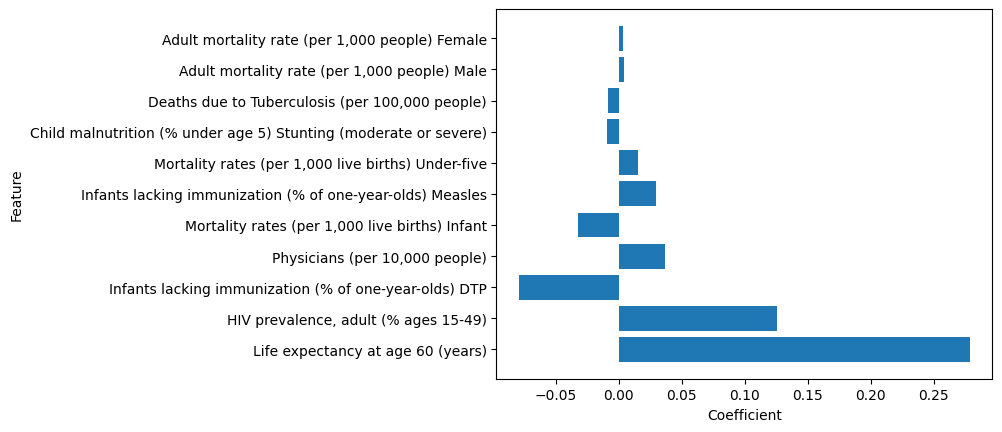

In [36]:
import matplotlib.pyplot as plt

plt.barh(coef.feature, coef.coef)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

### SVM

In [38]:
features = np.array(features)

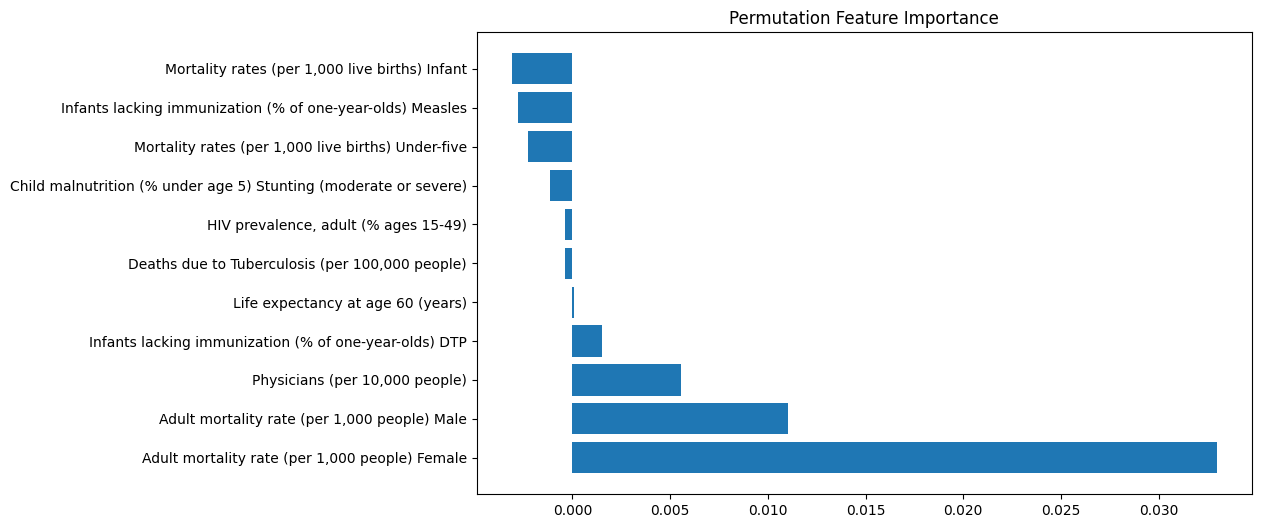

Adult mortality rate (per 1,000 people) Female 0.03296098695913443
Adult mortality rate (per 1,000 people) Male 0.011051680244640061
Physicians (per 10,000 people) 0.005579199227328258
Infants lacking immunization (% of one-year-olds) DTP 0.0015071784073038108
Life expectancy at age 60 (years) 6.93246854734042e-05
Deaths due to Tuberculosis (per 100,000 people) -0.0003671998643111074
HIV prevalence, adult (% ages 15-49) -0.000379191945713242
Child malnutrition (% under age 5) Stunting (moderate or severe) -0.001149844246403442
Mortality rates (per 1,000 live births) Under-five -0.0022654976841126606
Infants lacking immunization (% of one-year-olds) Measles -0.0027723297669111414
Mortality rates (per 1,000 live births) Infant -0.003085458085144377


In [39]:
from sklearn.inspection import permutation_importance

# fit the SVM model with RBF kernel
svr = SVR(kernel='rbf', C=1)
svr.fit(X_train, y_train)

# compute permutation importance
result = permutation_importance(svr, X_test, y_test, n_repeats=10, random_state=42)

# plot feature importance
fig, ax = plt.subplots(figsize=(10, 6))
idx = result.importances_mean.argsort()[::-1]
ax.barh(np.array(features)[idx], result.importances_mean[idx])
ax.set_title("Permutation Feature Importance")
plt.show()

# print feature importance
for feature, importance in zip(features[idx], result.importances_mean[idx]):
    print(feature, importance)


Best parameters: {'learning_rate': 0.01, 'n_estimators': 200}
R-squared: -0.04606053847016356


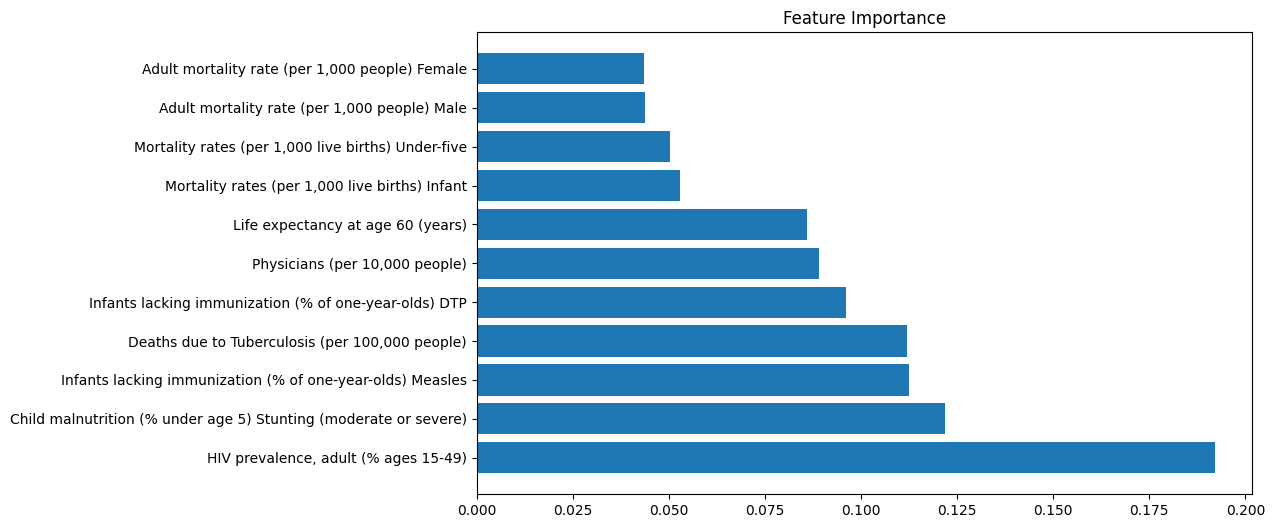

In [40]:
# gradient boosting

from sklearn.ensemble import GradientBoostingRegressor

parameters = {'learning_rate': [0.01, 0.1, 1], 'n_estimators': [100, 200, 300]}
gbr = GradientBoostingRegressor()
clf = GridSearchCV(gbr, parameters)
clf.fit(X_train, y_train)
print('Best parameters:', clf.best_params_)
print('R-squared:', clf.score(X_test, y_test))

# plot feature importance
fig, ax = plt.subplots(figsize=(10, 6))
idx = clf.best_estimator_.feature_importances_.argsort()[::-1]
ax.barh(np.array(features)[idx], clf.best_estimator_.feature_importances_[idx])
ax.set_title("Feature Importance")
plt.show()


### Decision Tree 

Best parameters: {'max_depth': 3}
R-squared: -0.4132105906774204


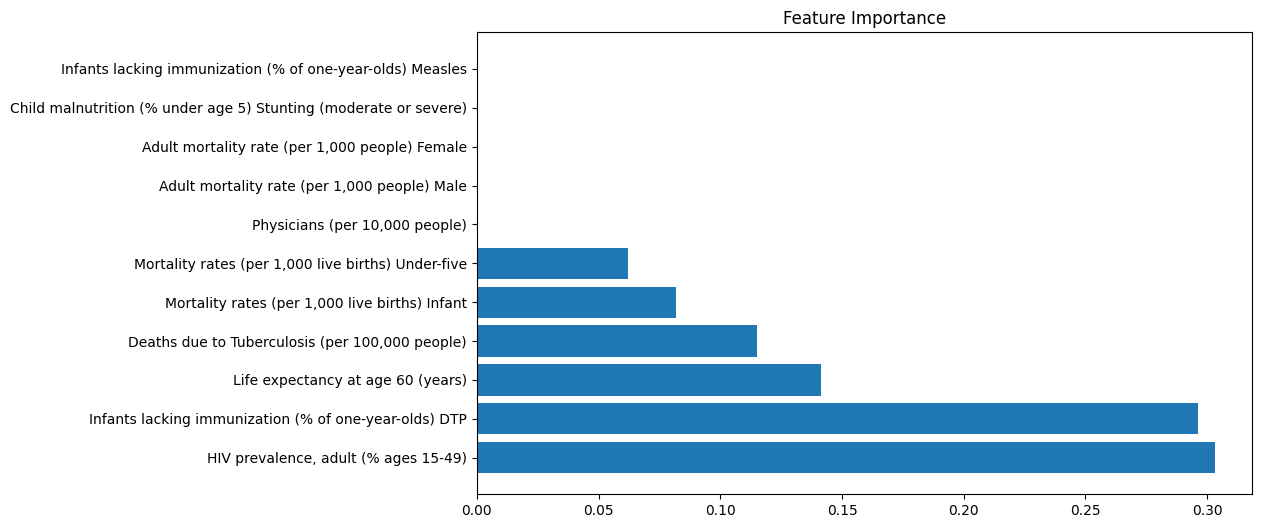

In [41]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor

parameters = {'max_depth': [3, 5, 10]}
dtr = DecisionTreeRegressor()
clf = GridSearchCV(dtr, parameters)
clf.fit(X_train, y_train)
print('Best parameters:', clf.best_params_)
print('R-squared:', clf.score(X_test, y_test))

# plot feature importance
fig, ax = plt.subplots(figsize=(10, 6))
idx = clf.best_estimator_.feature_importances_.argsort()[::-1]
ax.barh(np.array(features)[idx], clf.best_estimator_.feature_importances_[idx])
ax.set_title("Feature Importance")
plt.show()

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


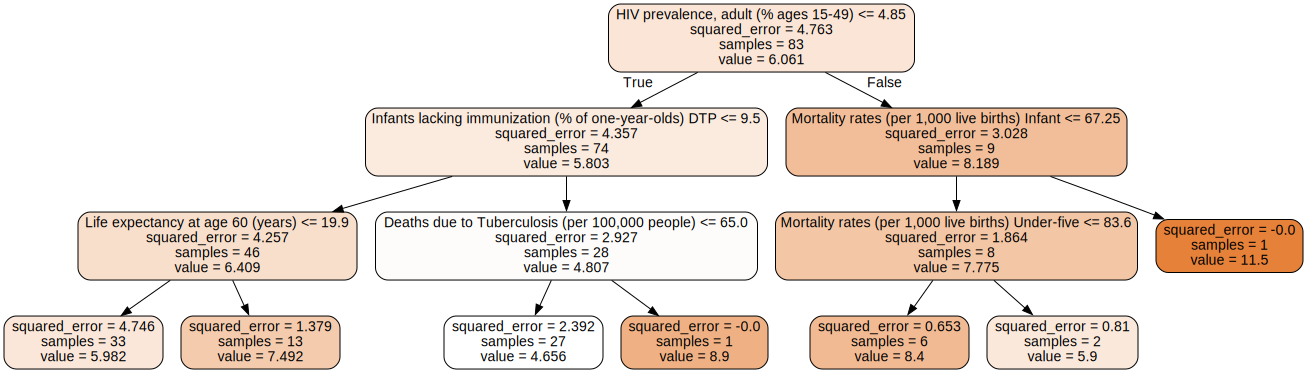

In [44]:
# decision tree graph
%pip install graphviz
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf.best_estimator_, out_file=None, feature_names=features[:-1], filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph
